In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

from pathlib import Path

from attila.data.parse import parse_data, get_data
from attila.util.config import get_config
from attila.util.plots import plot_sample
from attila.experiments.data import load_experiments
from attila.experiments.do import do_batch_experiments
from attila.experiments.tools import create_tex_experiments

In [3]:
_here = Path('.').resolve()
config = get_config(_here / './config.ini')

data_path = _here / config.get('data', 'folder')
data_path = data_path.resolve()

out_path = Path(config.get('experiments', 'output folder')).resolve()
out_path.mkdir(parents=True, exist_ok=True)  # rm and mkdir if existing

images_path = data_path / config.get('data', 'images')
masks_path = data_path / config.get('data', 'masks')

In [49]:
raw = get_data(images_path, masks_path)
X, y = parse_data(
    raw,
    (config.getint('image', 'width'), config.getint('image', 'height'))
)

40

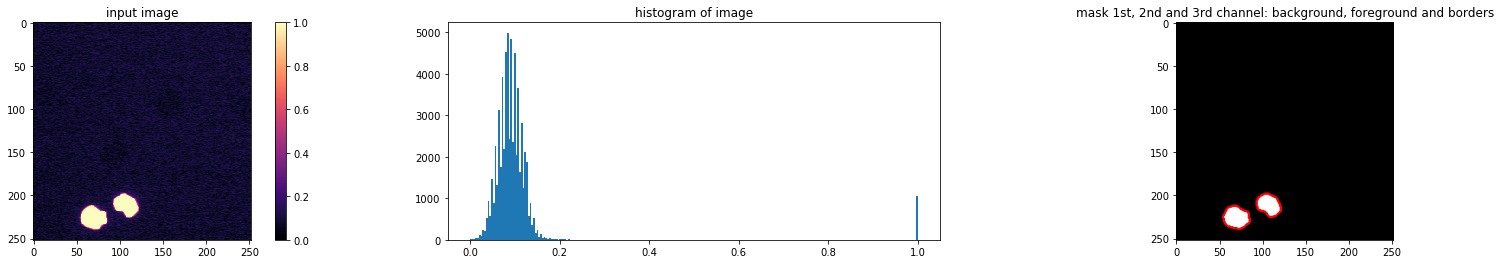

In [56]:
plot_sample(X, y)

In [14]:
experiments_file = _here / config.get('experiments', 'output file')
experiments = load_experiments(experiments_file)

In [60]:
do_batch_experiments(experiments, (X, y), config, out_path)

testing data: X ~ (28, 252, 252, 1), y ~ (28, 252, 252, 3)
ready to perform #1 / 2 batch of experiments
augmented training data: X ~ (216, 252, 252, 1), y ~ (216, 252, 252, 3)
ready to perform 2 experiments
=== experiment #1 / 2: wow
= dataset training: X ~ (216, 252, 252, 1), y ~ (216, 212, 212, 3)
= dataset validation: X ~ (10, 252, 252, 1), y ~ (10, 212, 212, 3)
= dataset test: X ~ (28, 252, 252, 1), y ~ (28, 212, 212, 3)
=== model
= # layers: 53
= # total params: 1897987
= # trainable params: 1897987
= # non-trainable params: 0
Epoch 1/3
53/54 [============================>.] - ETA: 0s - loss: 0.1707 - accuracy: 0.9455 - batch_metric-mean_IoU: 0.4069 - batch_metric-mean_DSC: 0.3356
Epoch 00001: loss improved from inf to 0.16808, saving model to /home/h4/stfo194b/scratch/attila/out/run-0/wow/model.h5
54/54 [==============================] - 3s 58ms/step - loss: 0.1681 - accuracy: 0.9462 - batch_metric-mean_IoU: 0.4099 - batch_metric-mean_DSC: 0.3377 - val_loss: 0.0245 - val_accuracy

54/54 [==============================] - 2s 44ms/step - loss: 0.0220 - accuracy: 0.9881 - batch_metric-mean_IoU: 0.6073 - batch_metric-mean_DSC: 0.4707 - val_loss: 0.0228 - val_accuracy: 0.9901 - val_batch_metric-mean_IoU: 0.6010 - val_batch_metric-mean_DSC: 0.4798 - lr: 0.0010
Epoch 3/3
53/54 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9928 - batch_metric-mean_IoU: 0.6789 - batch_metric-mean_DSC: 0.5192
Epoch 00003: loss improved from 0.02199 to 0.01229, saving model to /home/h4/stfo194b/scratch/attila/out/run-1/wow_1/model.h5
7/7 [==============================] - 0s 12ms/step
=== evaluation stats
= metrics on test set (size: 28)
= batch_metric-mean_IoU ~ mean 0.726 median 0.725 std 0.017
= batch_metric-mean_DSC ~ mean 0.555 median 0.555 std 0.012
done! output folder is /home/h4/stfo194b/scratch/attila/out/run-1


In [61]:
create_tex_experiments(config, out_path)

run #1: loaded 2 results from /home/h4/stfo194b/scratch/attila/out/run-0/experiments.json
creating .tex table for 2 experiments configurations

wow & \cmark{} & \cmark{} & valid & 53 & 1897987 \\
wow_1 & \xmark{} & \xmark{} & same & 21 & 1697795 \\

creating .tex table for 2 experiments results

wow & \textbf{0.761} & \textbf{0.577} \\
wow_1 & 0.735 (-3.4 \%) & 0.560 (-2.9 \%) \\

run #2: loaded 2 results from /home/h4/stfo194b/scratch/attila/out/run-1/experiments.json
creating .tex table for 2 experiments configurations

wow & \cmark{} & \cmark{} & valid & 53 & 1897987 \\
wow_1 & \xmark{} & \xmark{} & same & 21 & 1697795 \\

creating .tex table for 2 experiments results

wow & \textbf{0.752} & \textbf{0.572} \\
wow_1 & 0.726 (-3.5 \%) & 0.555 (-3.0 \%) \\

creating .tex table for 2 runs

wow & \textbf{0.757} & \textbf{0.575} \\
wow_1 & 0.730 (-3.5 \%) & 0.558 (-3.0 \%) \\
